# Выбор растров для анализа

В этом документе исследуюется вопрос об отборе зимних сцен к дальнейшему анализу.

Основная идея классификации рубок по зимним снимкам состоит в том, что в зимний период растительность практически не изменяется, а следовательно резкие изменения отажающей способности будут связаны с изменением покрова, а не фенологией. Как следствие, перед основным анализом необходимо научиться определять границы зимнего периода за конкретный год, а так же (в иделе) устанавливать пригодность/непригодность сцены для дальнейшего анализа.

## Идентификаторы используемых сцен
Для работы были выбраны сцены Landsat из следующих Path/Row: 112027, 112028, 113027.

В выборку попали все имеющиеся зимние сцены за 2014, 2015 и 2016 годы с захватом конца осени и начала весны. Также для контраста были взяты наугад несколько летних сцен.

Итого, в анализе используются 59 сцен:

Path/Row | Число сцен| Список сцен 
----------|-|-----
112027 | 19 | LC81120272014074LGN00, LC81120272014090LGN00, LC81120272014106LGN00, LC81120272014346LGN00, LC81120272014362LGN00, LC81120272015045LGN00, LC81120272015077LGN00, LC81120272015093LGN00, LC81120272015109LGN00, **LC81120272015157LGN00**, **LC81120272015189LGN00**, LC81120272015333LGN00, LC81120272015349LGN00, LC81120272015365LGN00, LC81120272016032LGN01, LC81120272016048LGN00, LC81120272016064LGN00, LC81120272016080LGN00, LC81120272016096LGN00
112028 | 21 | LC81120282014042LGN00, LC81120282014090LGN00, LC81120282014106LGN00, LC81120282014346LGN00, LC81120282014362LGN00, LC81120282015045LGN00, LC81120282015077LGN00, LC81120282015093LGN00, LC81120282015109LGN00, **LC81120282015141LGN00**, **LC81120282015189LGN00**, **LC81120282015237LGN00**, LC81120282015317LGN00, LC81120282015349LGN00, LC81120282015365LGN00, LC81120282016016LGN00, LC81120282016032LGN01, LC81120282016048LGN00, LC81120282016064LGN00, LC81120282016080LGN00, LC81120282016096LGN00
113027 | 19 | LC81130272014049LGN00, LC81130272014065LGN00, LC81130272014081LGN00, LC81130272014097LGN00, LC81130272014113LGN00, LC81130272014337LGN00, LC81130272014353LGN00, LC81130272015036LGN00, LC81130272015052LGN00, LC81130272015068LGN00, LC81130272015084LGN00, LC81130272015100LGN00, LC81130272015116LGN00, LC81130272015340LGN00, LC81130272015356LGN00, LC81130272016039LGN00, LC81130272016055LGN00, LC81130272016071LGN00, LC81130272016087LGN00

В таблице выделены сцены, не попадающие в интересующий нас период.


## Предобработка
Каждая сцена прошла следующую предобработку:
1. По каждому каналу сцены рассчитана спектральная отражательная способность (ToAR Reflectance).
2. Рассчитана маска облачности (см. [соответствующий блокнот](https://176.9.38.120/cruncher/notebooks/deforestation/CMASK_exploration.ipynb)) и пиксели, попадающие в облачные участки, сброшены в No-Data.

## Выбор зимних сцен

Поскольку предполагается, что основные изменения земного покрова происходят весной-летом-осенью, а не зимой, то ожидаем, что зимние снимки должны быть очень похожи между собой. Видимо, эта схожесть должна проявляться после установления снежного покрова. Поэтому данный раздел посвящен выявлению "похожих" сцен (в пределах одного Path/Row) и проверки гипотезы о том, что зимние снимки являются схожими.

В качестве меры сходства выберем коэффициент корреляции.

Сначала будем обрабатывать каждый Path/Row по отдельности, затем сравним сцены из разных Path/Row между собой.

Загрузим библиотеку для работы с GRASS GIS.

In [1]:
library(rgrass7)
initGRASS(gisBase ='/usr/lib/grass70', 
          location = 'FOREST', mapset = 'landsat', 
          gisDbase = '/home/cruncher/GRASSDATA', override = TRUE)

Loading required package: sp
Loading required package: XML
GRASS GIS interface loaded with GRASS version: (GRASS not running)


gisdbase    /home/cruncher/GRASSDATA 
location    FOREST 
mapset      landsat 
rows        1973 
columns     1943 
north       5373615 
south       5136885 
west        470685 
east        703815 
nsres       119.9848 
ewres       119.9846 
projection  +proj=utm +no_defs +zone=53 +a=6378137 +rf=298.257223563
+towgs84=0.000,0.000,0.000 +to_meter=1 

## Path/Row 112027

Прочитаем в переменную список растров, очищенных от облачности и лежащих в Path/Row 112027:

In [2]:
pathrow112027 <- execGRASS("g.list", parameters = list(type = "raster", pattern = "clean*112027*B1"))
b1maps = attributes(pathrow112027)$resOut

clean.LC81120272014074LGN00_B1
clean.LC81120272014090LGN00_B1
clean.LC81120272014106LGN00_B1
clean.LC81120272014346LGN00_B1
clean.LC81120272014362LGN00_B1
clean.LC81120272015045LGN00_B1
clean.LC81120272015077LGN00_B1
clean.LC81120272015093LGN00_B1
clean.LC81120272015109LGN00_B1
clean.LC81120272015157LGN00_B1
clean.LC81120272015189LGN00_B1
clean.LC81120272015333LGN00_B1
clean.LC81120272015349LGN00_B1
clean.LC81120272015365LGN00_B1
clean.LC81120272016032LGN01_B1
clean.LC81120272016048LGN00_B1
clean.LC81120272016064LGN00_B1
clean.LC81120272016080LGN00_B1
clean.LC81120272016096LGN00_B1


Установим регион так, чтобы он накрывал Path/Row 112027. Кроме того, уменьшим разрешения региона (это позволит ускорить расчеты за счет меньших объемов данных, а на корреляцию между переменными влияет мало):

In [3]:
execGRASS("g.region", parameters=list(raster=b1maps[1], res='120'), flags='p')

projection: 1 (UTM)
zone:       53
datum:      wgs84
ellipsoid:  wgs84
north:      5373615
south:      5136885
west:       470685
east:       703815
nsres:      119.98479473
ewres:      119.98455996
rows:       1973
cols:       1943
cells:      3833539


Прочитаем первый канал имеющихся растров в перееменную:

In [4]:
b1 =  readRAST(b1maps, )

Creating BIL support files...
Exporting raster as floating values (bytes=8)
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
Creating BIL support files...
Exporting raster as floating values (bytes=8)
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
Creating BIL support files...
Exporting raster as floating values (bytes=8)
   0%   3%   6%   9%  12%  15%  18%

In [5]:
str(b1) # 1:6811700

Formal class 'SpatialGridDataFrame' [package "sp"] with 4 slots
  ..@ data       :'data.frame':	3833539 obs. of  19 variables:
  .. ..$ clean.LC81120272014074LGN00_B1: num [1:3833539] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ clean.LC81120272014090LGN00_B1: num [1:3833539] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ clean.LC81120272014106LGN00_B1: num [1:3833539] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ clean.LC81120272014346LGN00_B1: num [1:3833539] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ clean.LC81120272014362LGN00_B1: num [1:3833539] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ clean.LC81120272015045LGN00_B1: num [1:3833539] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ clean.LC81120272015077LGN00_B1: num [1:3833539] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ clean.LC81120272015093LGN00_B1: num [1:3833539] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ clean.LC81120272015109LGN00_B1: num [1:3833539] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ clean.LC81120272015157LGN00_B1: num [1:383353

In [6]:
b1.data = attributes(b1)$data

In [7]:
b1.cor = cor(b1.data, use = "pairwise.complete.obs")
b1.cor

,clean.LC81120272014074LGN00_B1,clean.LC81120272014090LGN00_B1,clean.LC81120272014106LGN00_B1,clean.LC81120272014346LGN00_B1,clean.LC81120272014362LGN00_B1,clean.LC81120272015045LGN00_B1,clean.LC81120272015077LGN00_B1,clean.LC81120272015093LGN00_B1,clean.LC81120272015109LGN00_B1,clean.LC81120272015157LGN00_B1,clean.LC81120272015189LGN00_B1,clean.LC81120272015333LGN00_B1,clean.LC81120272015349LGN00_B1,clean.LC81120272015365LGN00_B1,clean.LC81120272016032LGN01_B1,clean.LC81120272016048LGN00_B1,clean.LC81120272016064LGN00_B1,clean.LC81120272016080LGN00_B1,clean.LC81120272016096LGN00_B1
clean.LC81120272014074LGN00_B1,1.0000000,-0.1354375,-0.1247237,0.8802823,0.8396236,0.8302910,0.8421111,-0.4508648,-0.1757775,-0.1423857,0.1985029,0.6871749,0.6010866,0.8907137,0.8986926,0.8263033,0.8704423,0.8506036,-0.2500605
clean.LC81120272014090LGN00_B1,-0.13543754,1.00000000,0.34318549,-0.09293199,-0.15006718,-0.02827499,-0.08856617,0.12658970,0.29670037,0.18380687,-0.07678770,-0.02918147,-0.17997777,-0.07926205,-0.09500314,-0.03897832,-0.06157355,-0.05427798,0.37607396
clean.LC81120272014106LGN00_B1,-0.12472369,0.34318549,1.00000000,-0.20938157,-0.11561765,0.06747634,0.24231293,-0.06363282,0.18233460,0.12967744,-0.15106496,-0.03646006,-0.13763959,-0.04845431,-0.04681482,0.08579100,0.04415182,0.09535526,0.24882088
clean.LC81120272014346LGN00_B1,0.88028231,-0.09293199,-0.20938157,1.00000000,0.85329567,0.87910437,0.84782078,-0.43843272,-0.17419645,-0.03547721,0.19299845,0.72487089,0.59868330,0.90297513,0.91055080,0.88779528,0.86184900,0.83020394,-0.24052915
clean.LC81120272014362LGN00_B1,0.83962364,-0.15006718,-0.11561765,0.85329567,1.00000000,0.79677716,0.80778950,-0.48162151,-0.10909457,-0.08212875,0.15850178,0.65912882,0.59659482,0.84289068,0.85050665,0.81932045,0.81486868,0.80858512,-0.22925749
clean.LC81120272015045LGN00_B1,0.83029096,-0.02827499,0.06747634,0.87910437,0.79677716,1.00000000,0.88795745,-0.38790295,-0.11004069,-0.07884812,0.13558918,0.76104793,0.48709544,0.91607541,0.93085797,0.91019714,0.89854432,0.86554841,-0.23430847
clean.LC81120272015077LGN00_B1,0.84211113,-0.08856617,0.24231293,0.84782078,0.80778950,0.88795745,1.00000000,-0.70341783,-0.18800255,-0.10377171,0.12176696,0.71070988,0.56427997,0.88275240,0.90157513,0.91155803,0.91384176,0.87806510,-0.39518759
clean.LC81120272015093LGN00_B1,-0.45086482,0.12658970,-0.06363282,-0.43843272,-0.48162151,-0.38790295,-0.70341783,1.00000000,0.14642798,0.07656845,0.01282497,-0.26931694,-0.44756960,-0.41011231,-0.48456993,-0.57244098,-0.51769739,-0.51030754,0.31043272
clean.LC81120272015109LGN00_B1,-0.17577750,0.29670037,0.18233460,-0.17419645,-0.10909457,-0.11004069,-0.18800255,0.14642798,1.00000000,0.16652747,-0.07505613,-0.04458740,-0.23868583,-0.12851683,-0.15251227,-0.09791389,-0.11495238,-0.14778926,0.31258405
clean.LC81120272015157LGN00_B1,-0.14238568,0.18380687,0.12967744,-0.03547721,-0.08212875,-0.07884812,-0.10377171,0.07656845,0.16652747,1.00000000,-0.07467378,-0.01574995,-0.19586909,-0.07676290,-0.08954908,-0.03075250,-0.12757607,-0.07545358,0.19917822


Оценим суммарные корреляции, посчитав сумму абсолютных значений корреляций для каждого растра:

In [8]:
rowSums(abs(b1.cor))

clean.LC81120272014074LGN00_B1 clean.LC81120272014090LGN00_B1 
                     11.495078                       3.436676 
clean.LC81120272014106LGN00_B1 clean.LC81120272014346LGN00_B1 
                      3.372895                      11.561379 
clean.LC81120272014362LGN00_B1 clean.LC81120272015045LGN00_B1 
                     11.015670                      11.205937 
clean.LC81120272015077LGN00_B1 clean.LC81120272015093LGN00_B1 
                     11.991487                       7.410731 
clean.LC81120272015109LGN00_B1 clean.LC81120272015157LGN00_B1 
                      3.861700                       2.884757 
clean.LC81120272015189LGN00_B1 clean.LC81120272015333LGN00_B1 
                      3.274154                       9.615976 
clean.LC81120272015349LGN00_B1 clean.LC81120272015365LGN00_B1 
                      8.935855                      11.721124 
clean.LC81120272016032LGN01_B1 clean.LC81120272016048LGN00_B1 
                     11.971618                      11.556906 
clean.LC81120272016064LGN00_B1 clean.LC81120272016080LGN00_B1 
                     11.702993                      11.405601 
clean.LC81120272016096LGN00_B1 
                      5.442828

Корреляцию сложно оценить гляда на таблицу, для удобства визуализацю построим коррелограмму.

In [9]:
library(corrgram)

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


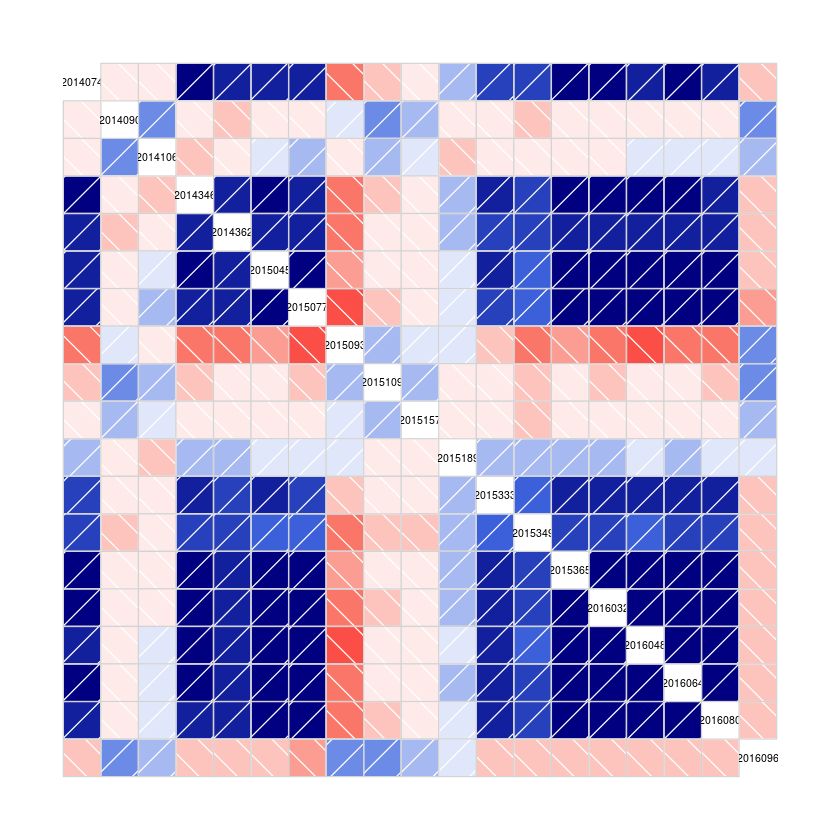

In [10]:
dates = sapply(names(b1.data), function(x){substr(x, 16,22)})
corrgram(b1.cor, order=FALSE, labels=dates)

Синим цветом закодирована положительная корреляция, красный цвет -- отрицательная корреляция. При этом чем ярче цвет, тем более сильная корреляция обнаружена.

Отобразим для большей наглядности наши данные на плоскости таким образом, чтобы сильно коррелированные растры лежали рядом, а те растры, которые слабо коррелируют находились в стороне. Для этого воспользуемся многомерным шкалированием.

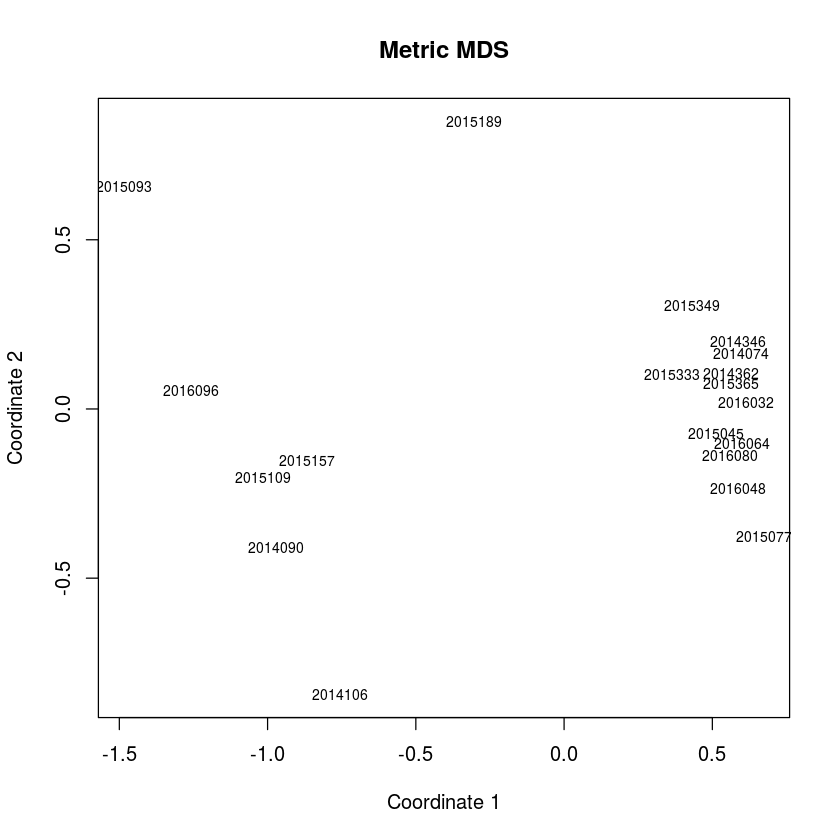

In [11]:
d <- 2 - b1.cor # Нужна матрица расстояний. Оценим ее через корреляции
fit <- cmdscale(d, eig=TRUE, k=2)
# Строим график
x <- fit$points[,1]
y <- fit$points[,2]
plot(x, y, xlab="Coordinate 1", ylab="Coordinate 2",
  main="Metric MDS", type="n")
text(x, y, labels = dates, cex=.7) 

Глядя на корреляции и результаты многомерного шкалирования, можно сказать, что:
 * в одной группе лежат зимние снимки и близкие к ним (LC81120272015349LGN00_B1, LC81120272014346LGN00_B1, LC81120272014074LGN00_B1, LC81120272015333LGN00_B1, LC81120272014362LGN00_B1, LC81120272015365LGN00_B1, LC81120272016032LGN00_B1, LC81120272015045LGN00_B1, LC81120272016064LGN00_B1, LC81120272016080LGN00_B1, LC81120272016048LGN00_B1), немного в стороне LC81120272015077LGN00_B1;
 * весенние снимки менее похожи между собой, чем зимние (видимо разные стадии пробуждения растительности), и они формируют несколько отдельных групп;
 * летние снимки не очень похожи между собой (видимо, месяц разницы для лета много значит?);
 * очень странный растр clean.LC81120272015093LGN00_B1: корреляция между этим растром и остальными - отрицательна, причем сила связи доходит по модулю до 0.5.

Полностью аналогичная картина наблюдается в остальных каналах.

### Вывод по Path/Row 112027

Таким образом видим, что если использовать коэффициент корреляции в качестве сходства и различия растров, то растры, полученные в зимний период представляют собой достаточно компактную группу с близкими свойствами. Таким образом для анализа отберем следующие растры, относящиеся к зимнему периоду:
 * LC81120272014074LGN00, LC81120272015333LGN00, LC81120272014362LGN00, LC81120272015356LGN00, LC81120272016032LGN00, LC81120272015045LGN00, LC81120272016064LGN00, LC81120272016080LGN00, LC81120272016048LGN00, LC81120272015077LGN00.

## Path/Row 112028

Проделаем аналогичную работу по Path/Row 112028.

In [12]:
pathrow112028 <- execGRASS("g.list", parameters = list(type = "raster", pattern = "clean*112028*B2"))
b2maps = attributes(pathrow112028)$resOut
b2 = readRAST(b2maps)
b2.data = attributes(b2)$data

clean.LC81120282014042LGN00_B2
clean.LC81120282014090LGN00_B2
clean.LC81120282014106LGN00_B2
clean.LC81120282014346LGN00_B2
clean.LC81120282014362LGN00_B2
clean.LC81120282015045LGN00_B2
clean.LC81120282015077LGN00_B2
clean.LC81120282015093LGN00_B2
clean.LC81120282015109LGN00_B2
clean.LC81120282015141LGN00_B2
clean.LC81120282015189LGN00_B2
clean.LC81120282015237LGN00_B2
clean.LC81120282015317LGN00_B2
clean.LC81120282015349LGN00_B2
clean.LC81120282015365LGN00_B2
clean.LC81120282016016LGN00_B2
clean.LC81120282016032LGN01_B2
clean.LC81120282016048LGN00_B2
clean.LC81120282016064LGN00_B2
clean.LC81120282016080LGN00_B2
clean.LC81120282016096LGN00_B2
Creating BIL support files...
Exporting raster as floating values (bytes=8)
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  8

,clean.LC81120282014042LGN00_B2,clean.LC81120282014090LGN00_B2,clean.LC81120282014106LGN00_B2,clean.LC81120282014346LGN00_B2,clean.LC81120282014362LGN00_B2,clean.LC81120282015045LGN00_B2,clean.LC81120282015077LGN00_B2,clean.LC81120282015093LGN00_B2,clean.LC81120282015109LGN00_B2,clean.LC81120282015141LGN00_B2,⋯,clean.LC81120282015237LGN00_B2,clean.LC81120282015317LGN00_B2,clean.LC81120282015349LGN00_B2,clean.LC81120282015365LGN00_B2,clean.LC81120282016016LGN00_B2,clean.LC81120282016032LGN01_B2,clean.LC81120282016048LGN00_B2,clean.LC81120282016064LGN00_B2,clean.LC81120282016080LGN00_B2,clean.LC81120282016096LGN00_B2
clean.LC81120282014042LGN00_B2,1,0.00566006856079404,-0.0920148448411151,0.735086862856892,0.468831810986476,0.682760197810604,0.869279486412687,0.0281692689548341,-0.0999847857424864,0.0436694189052141,⋯,0.375485353018936,0.298663228702888,0.253392881577934,0.924061520875637,0.808949655151326,0.937904188567345,0.94713422970721,0.931335356320079,0.787901638370803,-0.101763811292234
clean.LC81120282014090LGN00_B2,0.00566006856079404,1,0.313461841440022,-0.0914901323853536,-0.199886552339329,-0.130336992462826,-0.114906833965877,-0.110996873740282,0.229771215511845,-0.158151452905285,⋯,-0.37163982195824,-0.145969548851307,-0.348027982201337,-0.0782933104774493,0.0361224834743631,-0.0781707248797248,-0.0347933308584276,-0.0569364306808091,-0.0485780584448994,0.436944504147326
clean.LC81120282014106LGN00_B2,-0.0920148448411151,0.313461841440022,1,-0.146982421491924,-0.362453421278815,-0.296574032054247,-0.166268592037648,-0.0435906520842078,0.148880401499359,-0.157514857729148,⋯,-0.419285964589147,-0.334647727652624,-0.426015494653134,-0.182178561035588,-0.0438222871722765,-0.179601969487994,-0.144351905506179,-0.178441715287926,-0.206613342249487,0.327070216790198
clean.LC81120282014346LGN00_B2,0.735086862856892,-0.0914901323853536,-0.146982421491924,1,0.620156809666933,0.699414332180913,0.748868587953486,-0.037869402999001,-0.178335420578247,0.0508361311923923,⋯,0.303360500065774,-0.0059958952905282,0.163518144518208,0.757103802778847,0.630047669139703,0.749881856304978,0.746705624836071,0.74616940738612,0.65645763249892,-0.0754439198675191
clean.LC81120282014362LGN00_B2,0.468831810986476,-0.199886552339329,-0.362453421278815,0.620156809666933,1,0.749582771614423,0.509485440430174,-0.0732757069955199,-0.154458682922191,0.00129972699827106,⋯,0.617321003685937,0.564594389423804,0.410287613245142,0.561615233950366,0.499143651111829,0.549236450663673,0.513542442558217,0.547322514707175,0.595346236067142,-0.375575100618556
clean.LC81120282015045LGN00_B2,0.682760197810604,-0.130336992462826,-0.296574032054247,0.699414332180913,0.749582771614423,1,0.680516467159342,-0.173496822223378,-0.09933462686771,-0.0552046593552838,⋯,0.545021253532822,0.51835091929488,0.286586381322069,0.740872558484857,0.62319571528977,0.739970773853409,0.718584618569992,0.740250148806148,0.729985879978552,-0.268076939606636
clean.LC81120282015077LGN00_B2,0.869279486412687,-0.114906833965877,-0.166268592037648,0.748868587953486,0.509485440430174,0.680516467159342,1,0.0740567588276893,-0.197620570053512,0.111097523877705,⋯,0.476233617668885,0.311308240901159,0.343064284099342,0.88457091240217,0.755926071108329,0.897870239576379,0.88943363088832,0.907261775273198,0.784442406764232,-0.215763174833593
clean.LC81120282015093LGN00_B2,0.0281692689548341,-0.110996873740282,-0.0435906520842078,-0.037869402999001,-0.0732757069955199,-0.173496822223378,0.0740567588276893,1,-0.088522925176441,0.192978508106349,⋯,0.145073182834316,0.171151810699871,0.0995671344238289,0.0902703105788943,0.0693750154770933,0.0649147979966643,0.0664476507927114,0.050089377540461,-0.0810307692179429,-0.503954045621202
clean.LC81120282015109LGN00_B2,-0.0999847857424864,0.229771215511845,0.148880401499359,-0.178335420578247,-0.154458682922191,-0.09933462686771,-0.197620570053512,-0.088522925176441,1,-0.149965373520257,⋯,-0.215269731038681,-0.109677474898319,-0.174820632336362,-0.1381501

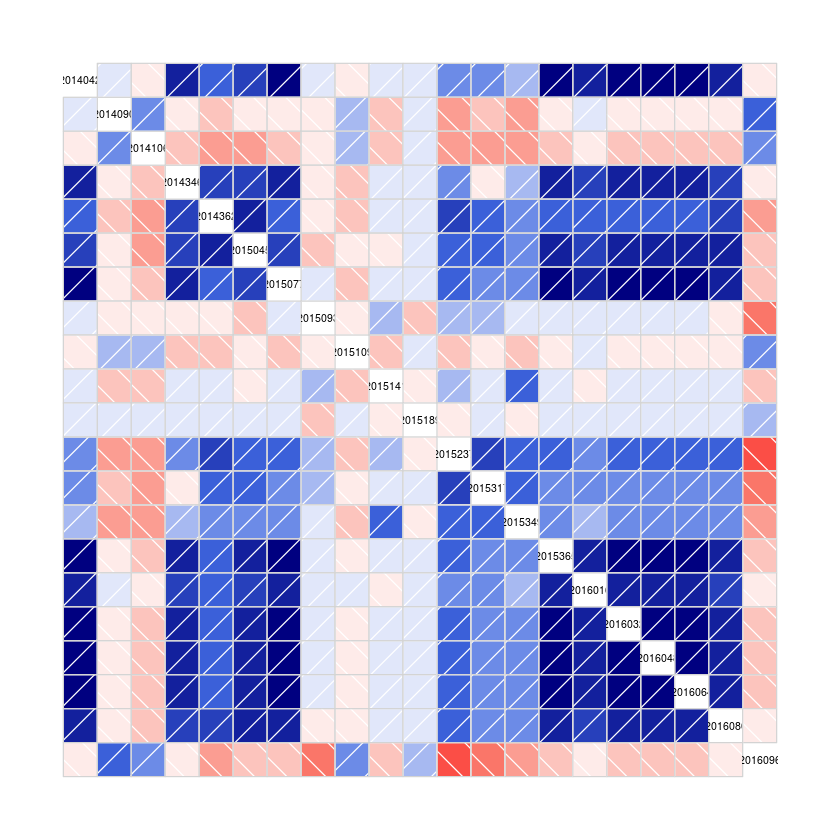

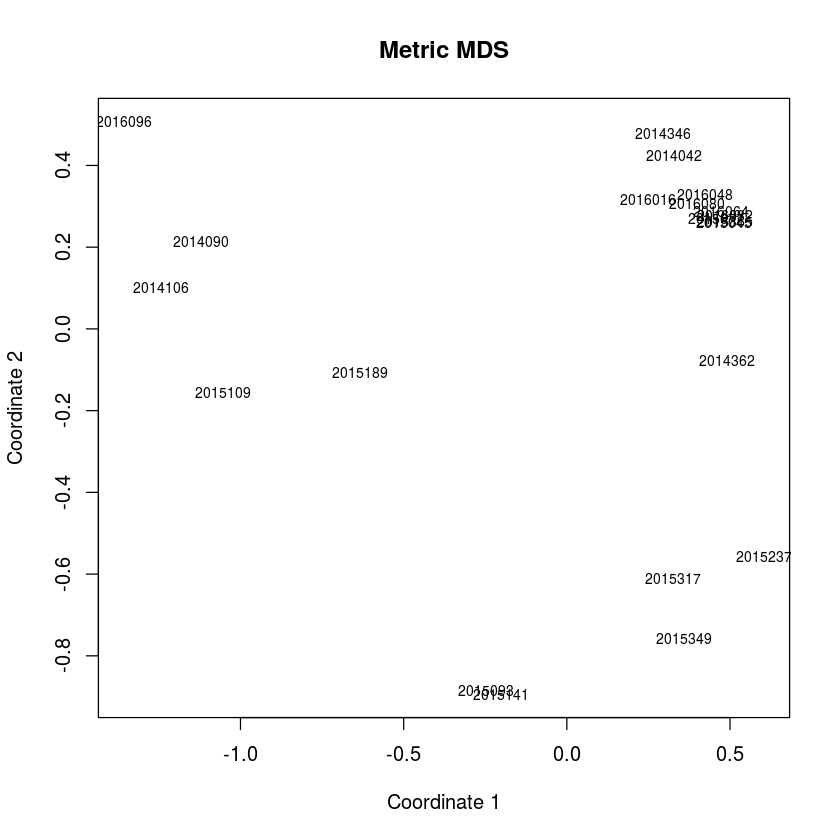

In [13]:
b2.cor = cor(b2.data, use = "pairwise.complete.obs")
b2.cor

dates = sapply(names(b2.data), function(x){substr(x, 16,22)})
corrgram(b2.cor, order=FALSE, labels=dates)

d <- 2 - b2.cor # Нужна матрица расстояний. Оценим ее через корреляции
fit <- cmdscale(d, eig=TRUE, k=2)
# Строим график
x <- fit$points[,1]
y <- fit$points[,2]
plot(x, y, xlab="Coordinate 1", ylab="Coordinate 2",
  main="Metric MDS", type="n")
text(x, y, labels = dates, cex=.7) 

### Вывод по Path/Row 112028

Оставим для анализа следующие сцены: 
LC81120282014042LGN00,
LC81120282014346LGN00,
LC81120282014362LGN00,
LC81120282015045LGN00,
LC81120282015077LGN00,
LC81120282015365LGN00,
LC81120282016016LGN00,
LC81120282016032LGN01,
LC81120282016048LGN00,
LC81120282016064LGN00,
LC81120282016080LGN00.

## Path/Row 113027

Проделаем аналогичную работу по Path/Row 113027.

In [14]:
pathrow113027 <- execGRASS("g.list", parameters = list(type = "raster", pattern = "clean*113027*B5"))
b5maps = attributes(pathrow113027)$resOut
b5 = readRAST(b5maps)
b5.data = attributes(b5)$data

clean.LC81130272014049LGN00_B5
clean.LC81130272014065LGN00_B5
clean.LC81130272014081LGN00_B5
clean.LC81130272014097LGN00_B5
clean.LC81130272014113LGN00_B5
clean.LC81130272014337LGN00_B5
clean.LC81130272014353LGN00_B5
clean.LC81130272015036LGN00_B5
clean.LC81130272015052LGN00_B5
clean.LC81130272015068LGN00_B5
clean.LC81130272015084LGN00_B5
clean.LC81130272015100LGN00_B5
clean.LC81130272015116LGN00_B5
clean.LC81130272015340LGN00_B5
clean.LC81130272015356LGN00_B5
clean.LC81130272016039LGN00_B5
clean.LC81130272016055LGN00_B5
clean.LC81130272016071LGN00_B5
clean.LC81130272016087LGN00_B5
Creating BIL support files...
Exporting raster as floating values (bytes=8)
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99%

,clean.LC81130272014049LGN00_B5,clean.LC81130272014065LGN00_B5,clean.LC81130272014081LGN00_B5,clean.LC81130272014097LGN00_B5,clean.LC81130272014113LGN00_B5,clean.LC81130272014337LGN00_B5,clean.LC81130272014353LGN00_B5,clean.LC81130272015036LGN00_B5,clean.LC81130272015052LGN00_B5,clean.LC81130272015068LGN00_B5,clean.LC81130272015084LGN00_B5,clean.LC81130272015100LGN00_B5,clean.LC81130272015116LGN00_B5,clean.LC81130272015340LGN00_B5,clean.LC81130272015356LGN00_B5,clean.LC81130272016039LGN00_B5,clean.LC81130272016055LGN00_B5,clean.LC81130272016071LGN00_B5,clean.LC81130272016087LGN00_B5
clean.LC81130272014049LGN00_B5,1.00000000,0.98130924,0.67909252,-0.09972044,-0.14773363,0.85737679,0.80130836,0.97554137,0.88848431,0.46503036,0.96418630,-0.06444438,0.42993781,0.75310028,0.94522474,0.92329415,0.97746113,0.90889603,0.34894370
clean.LC81130272014065LGN00_B5,0.98130924,1.00000000,0.71454215,-0.07795376,-0.13306391,0.84954217,0.80773898,0.97443087,0.87862428,0.45374910,0.96797245,-0.03059133,0.41146820,0.74895102,0.93667352,0.91996550,0.97894088,0.91371476,0.37588727
clean.LC81130272014081LGN00_B5,0.6790925183,0.7145421470,1.0000000000,-0.0007974425,-0.0994476816,0.5892570268,0.5662302983,0.6544808485,0.5787865258,0.2925835641,0.6700488049,0.3155093976,0.3958984393,0.5459575982,0.6079474051,0.7509389954,0.6698720767,0.6519898319,0.4357949423
clean.LC81130272014097LGN00_B5,-0.0997204426,-0.0779537598,-0.0007974425,1.0000000000,0.4164038453,-0.1515469746,-0.1274373517,-0.1085652024,-0.1731516458,-0.1407228341,-0.0863472720,0.0679246312,0.0541472131,-0.1468910378,-0.1050653063,-0.2527257170,-0.1000287113,-0.1026421921,0.1780847318
clean.LC81130272014113LGN00_B5,-0.14773363,-0.13306391,-0.09944768,0.41640385,1.00000000,-0.22116668,-0.16264888,-0.13359823,-0.20648512,-0.23819169,-0.12994828,-0.04450361,-0.16972115,-0.23770032,-0.15902259,-0.22382972,-0.15437127,-0.20882928,0.03472674
clean.LC81130272014337LGN00_B5,0.8573768,0.8495422,0.5892570,-0.1515470,-0.2211667,1.0000000,0.7829783,0.8460046,0.8653942,0.4190211,0.8388240,0.1565430,0.6138063,0.6534981,0.8302659,0.7469998,0.8508428,0.8247628,0.3408104
clean.LC81130272014353LGN00_B5,0.8013084,0.8077390,0.5662303,-0.1274374,-0.1626489,0.7829783,1.0000000,0.8047440,0.8272196,0.3274009,0.7800479,-0.1345140,0.3615850,0.6713341,0.7770472,0.8500428,0.8082990,0.7714350,0.3618597
clean.LC81130272015036LGN00_B5,0.97554137,0.97443087,0.65448085,-0.10856520,-0.13359823,0.84600464,0.80474401,1.00000000,0.87134327,0.45296091,0.96403439,-0.09446954,0.37979617,0.75630307,0.95543900,0.91227292,0.98464419,0.90566914,0.32446098
clean.LC81130272015052LGN00_B5,0.888484314,0.878624284,0.578786526,-0.173151646,-0.206485119,0.865394228,0.827219648,0.871343265,1.000000000,0.416498793,0.873553168,-0.002140447,0.539409498,0.711123706,0.821664303,0.929744470,0.868467124,0.817545728,0.277924506
clean.LC81130272015068LGN00_B5,0.46503036,0.45374910,0.29258356,-0.14072283,-0.23819169,0.41902111,0.32740091,0.45296091,0.41649879,1.00000000,0.44859341,-0.12752135,0.23106986,0.46304301,0.48799945,0.63973191,0.46387814,0.50117214,0.09275323


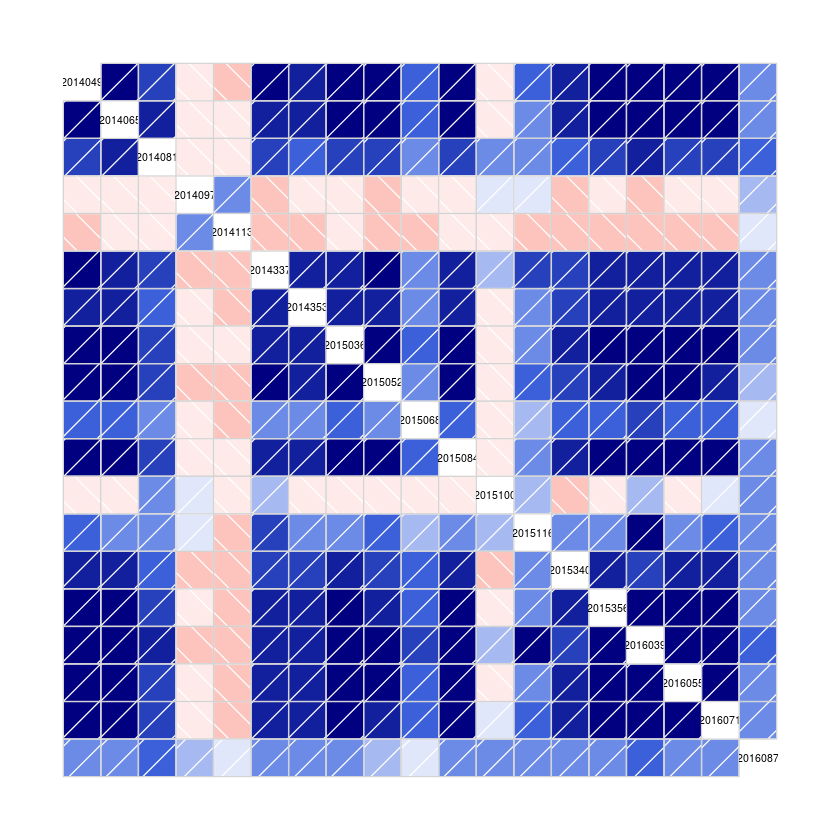

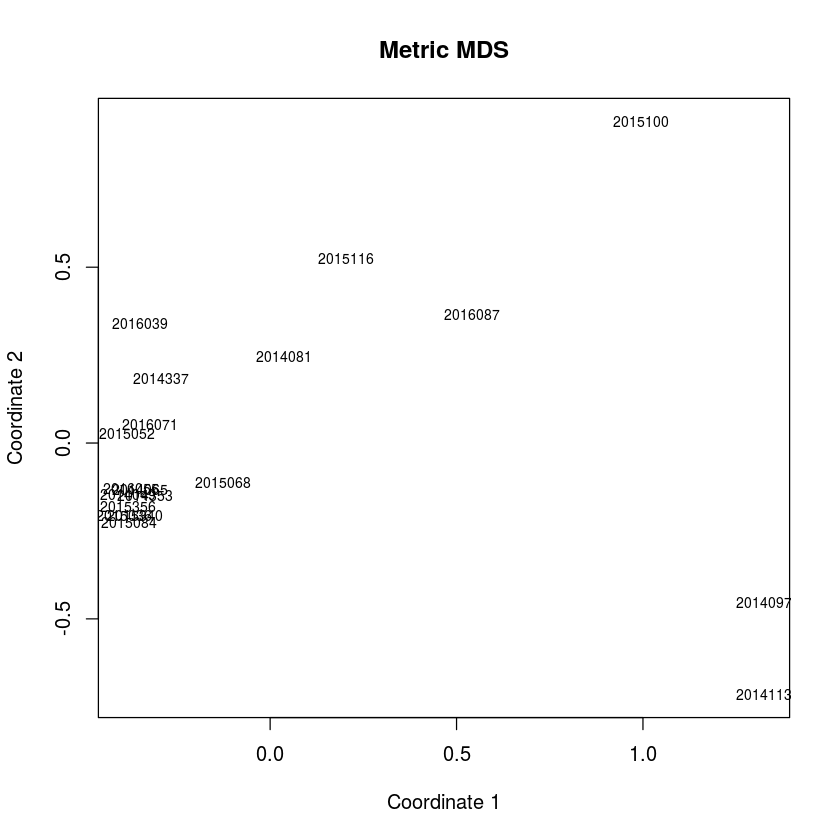

In [15]:
b5.cor = cor(b5.data, use = "pairwise.complete.obs")
b5.cor

dates = sapply(names(b5.data), function(x){substr(x, 16,22)})
corrgram(b5.cor, order=FALSE, labels=dates)

d <- 2 - b5.cor # Нужна матрица расстояний. Оценим ее через корреляции
fit <- cmdscale(d, eig=TRUE, k=2)
# Строим график
x <- fit$points[,1]
y <- fit$points[,2]
plot(x, y, xlab="Coordinate 1", ylab="Coordinate 2",
  main="Metric MDS", type="n")
text(x, y, labels = dates, cex=.7) 

### Вывод по Path/Row 113027

Оставим сцены LC81130272014049LGN00, LC81130272014065LGN00, LC81130272014337LGN00?, LC81130272014353LGN00, LC81130272015036LGN00, LC81130272015052LGN00, LC81130272015068LGN00?, LC81130272015084LGN00, LC81130272015340LGN00, LC81130272015356LGN00, LC81130272016039LGN00?, LC81130272016055LGN00?, LC81130272016071LGN00?

## Корреляции между сценами